### Importing Libraries

In [352]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.offline as pyo 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from matplotlib.colors import ListedColormap
#
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
#
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn import metrics
#
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
#
import warnings
warnings.filterwarnings("ignore")

### Loading Data

In [353]:
data = pd.read_csv("C:\data.csv")

In [354]:
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


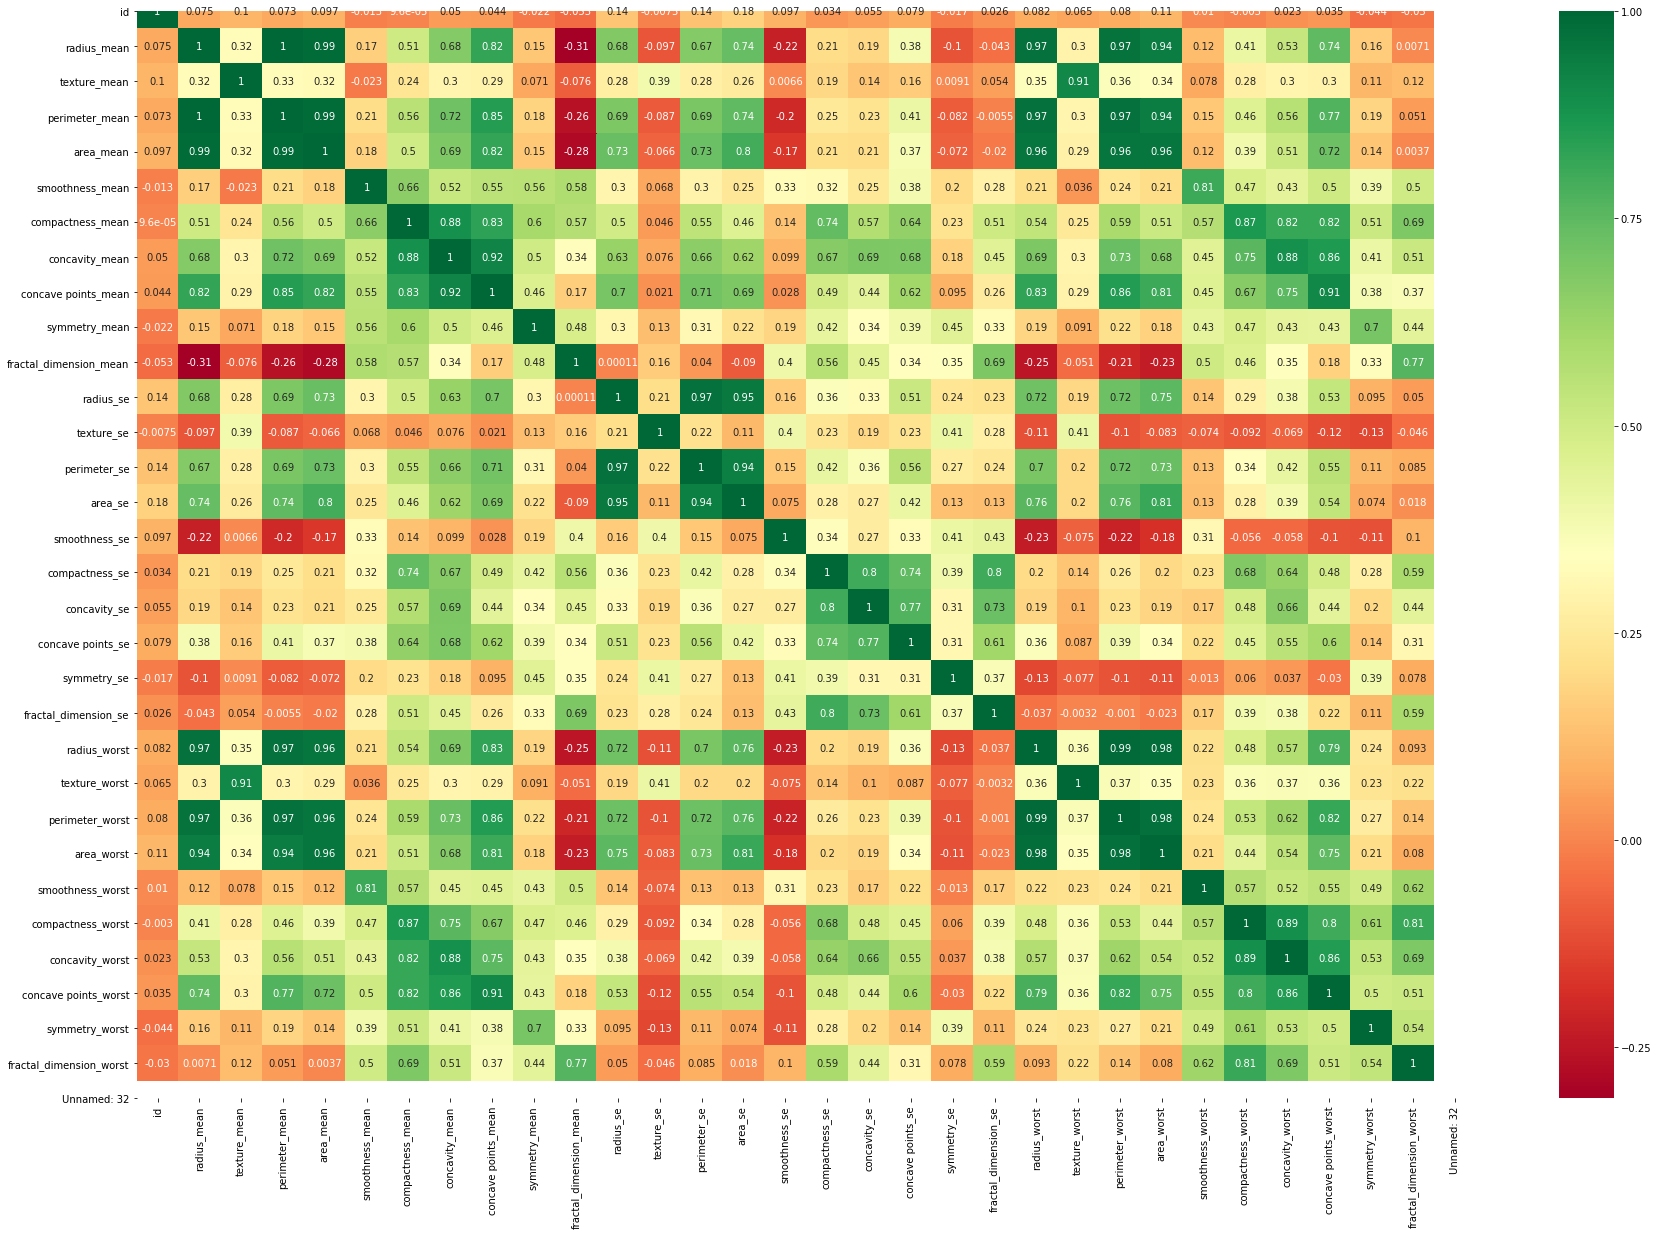

In [355]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [356]:
data.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


### Removing Unneccesary columns
Here we drop id and unnamed column

In [357]:
data.drop(["Unnamed: 32","id"],axis=1,inplace=True)

### Change object to integer
Since diagnosis column has values M and B we have to convert it to 1 and O 

In [358]:
data["diagnosis"] = [1 if item == "M" else 0  for item in data["diagnosis"]]
y = data["diagnosis"]
x = data.drop(["diagnosis"],axis=1)

### Applying mean value to cells where the value is 0

In [359]:
fill_values = Imputer(missing_values=0, strategy="mean", axis=0)
x = fill_values.fit_transform(x)

### Scaling data
Values are in different scales so values needed to be convert into same scale

In [360]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

### Building PCA

In [361]:
pca = PCA(n_components =2 )
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)

In [362]:
pca_data = pd.DataFrame(X_reduced_pca,columns=["p1","p2"])
pca_data["diagnosis"] = y

### Visualize Of New Dataframe

In [363]:
hue =pca_data["diagnosis"]
data = [go.Scatter(x = pca_data.p1,
                   y = pca_data.p2,
                   mode = 'markers',
                   marker=dict(
                           size=12,
                           color=hue,
                           symbol="pentagon",
                           line=dict(width=2) #çevre çizgileri
                           ))]  
                            
layout = go.Layout(title="PCA",
                   xaxis=dict(title="p1"),
                   yaxis=dict(title="p2"),
                   hovermode="closest")
fig = go.Figure(data=data,layout=layout)   
pyo.iplot(fig)

### Classification After PCA

In [364]:
pca_data.head()

,p1,p2,diagnosis
0,9.215240,1.856744,1
1,2.331375,-3.802905,1
2,5.724226,-1.105187,1
3,7.185647,10.157338,1
4,3.903994,-1.943270,1


In [365]:
pca.components_

array([[ 0.21742152,  0.10678932,  0.22620499,  0.22050082,  0.14273599,
         0.23990142,  0.25759309,  0.25979275,  0.14042283,  0.06735802,
         0.20892597,  0.02516689,  0.21409106,  0.20474074,  0.01900853,
         0.17098355,  0.15011751,  0.17941599,  0.04826584,  0.10490453,
         0.22705707,  0.10642145,  0.23581186,  0.22481285,  0.12738605,
         0.20976622,  0.22653287,  0.24977309,  0.1233939 ,  0.13275944],
       [-0.23671324, -0.05797206, -0.21826342, -0.23312117,  0.1802183 ,
         0.14607013,  0.06332873, -0.03273003,  0.18687424,  0.36366408,
        -0.10470218,  0.09741569, -0.08888496, -0.15221555,  0.2074017 ,
         0.22979393,  0.20399412,  0.14383641,  0.1873228 ,  0.27940095,
        -0.22305704, -0.04560356, -0.20329239, -0.22170517,  0.1652762 ,
         0.13673243,  0.10159443, -0.00522727,  0.13620034,  0.26930362]])

### Preparing X and Y

In [366]:
y_pca = pca_data.diagnosis
x_pca = pca_data.drop(["diagnosis"],axis=1)

### Splitting Data 

In [367]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y_pca, test_size=0.33, random_state=42)

###  K nearest neighbor via PCA Featuress

In [368]:
knn_pca = KNeighborsClassifier()
knn_pca.fit(x_train_pca, y_train_pca)
y_pred_pca = knn_pca.predict(x_test_pca)

In [369]:
knn_cm_pca = confusion_matrix(y_test_pca,y_pred_pca)
knn_acc_pca = metrics.accuracy_score(y_test_pca, y_pred_pca)
print(knn_cm_pca)

[[112   9]
 [  1  66]]


#### Accuracy

In [370]:
print("Accuracy = " + str(knn_acc_pca))

Accuracy = 0.9468085106382979


(-8.777530344253353, 13.772469655746967)

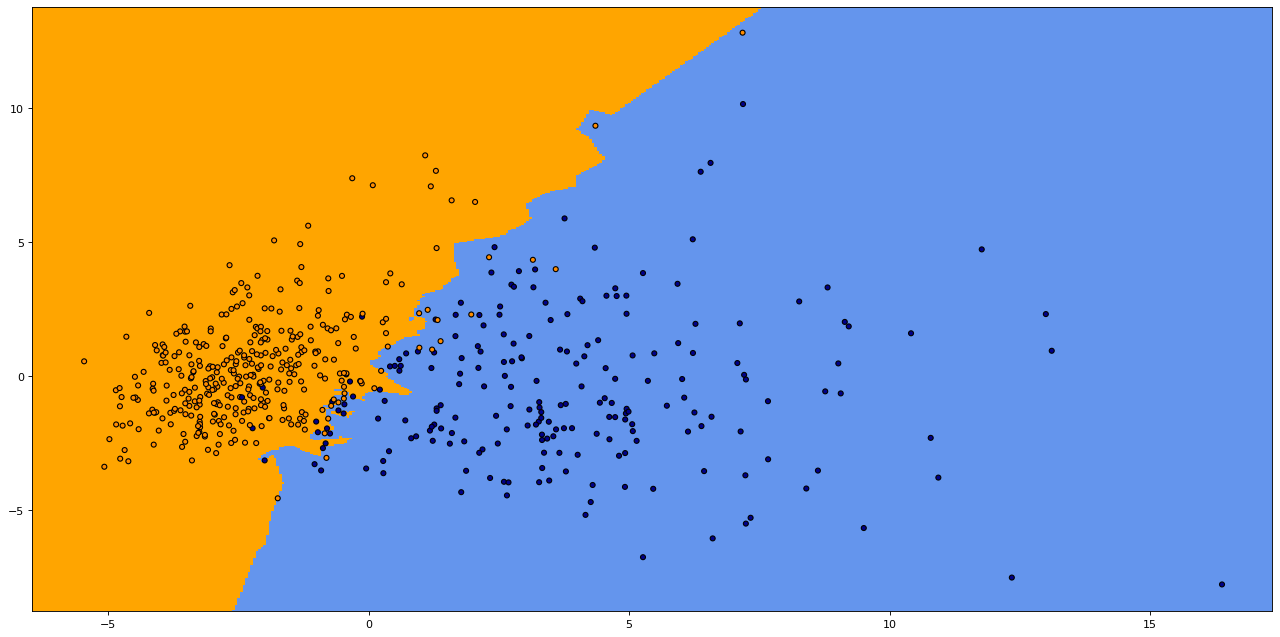

In [371]:
# visualize 
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .05 # step size in the mesh
X = x_pca
x_min, x_max = (X.iloc[:, 0].min() - 1), (X.iloc[:, 0].max() + 1)
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20, 10), dpi=80)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

### Random Forest Classification via PCA Features

In [372]:
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(x_train_pca, y_train_pca.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [373]:
predict_train_data = random_forest_model.predict(x_test_pca)

#### Accuracy

In [374]:
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test_pca, predict_train_data)))

Accuracy = 0.963
